# Обработка результатов

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import *

### Импорт результатов эксперимента

In [24]:
simd_table = pd.read_csv("rps_simd.csv");
sisd_table = pd.read_csv("rps_no_simd.csv")

simd_table.head(3)

,rps,count
0,0,0
1,1,0
2,2,0


### Получение среднего и ошибки

In [25]:
def stats(table):
    avg = np.average(table["rps"], weights = table["count"])
    error = sqrt(np.average((table["rps"] - avg) ** 2, weights = table["count"]));

    return (avg, error)

simd_stats = stats(simd_table)
sisd_stats = stats(sisd_table)

print("SIMD    -- Average: {avg} +- {error}".format(avg=simd_stats[0], error=simd_stats[1]));
print("No SIMD -- Average: {avg} +- {error}".format(avg=sisd_stats[0], error=sisd_stats[1]));
print("Increase: {result} * (1 +- {error_alpha})/(1 +- {error_beta})".format(
    result=simd_stats[0]/sisd_stats[0], error_alpha=simd_stats[1]/simd_stats[0], error_beta=sisd_stats[1]/sisd_stats[0]
));

result_min = simd_stats[0]/sisd_stats[0] * (1 - simd_stats[1]/simd_stats[0]) / (1 + sisd_stats[1]/sisd_stats[0])
result_max = simd_stats[0]/sisd_stats[0] * (1 + simd_stats[1]/simd_stats[0]) / (1 - sisd_stats[1]/sisd_stats[0])

print("Alt. form: {result} +- {error}".format(
    result=(result_max+result_min)/2, error=(result_max-result_min)/2
));

SIMD    -- Average: 2042.5620891810267 +- 80.00664338847655
No SIMD -- Average: 295.93764988009593 +- 7.6379996152147305
Increase: 6.902001452024116 * (1 +- 0.0391697485291894)/(1 +- 0.025809489324218778)
Alt. form: 6.913584382881027 +- 0.4487857435459377


### Визуализация

In [26]:
def draw(table):
    left_border  = table[table["count"] != 0]["rps"].min() - 1
    right_border = table[table["count"] != 0]["rps"].max() + 2

    plt.plot(list(table["rps"])[left_border : right_border], list(table["count"])[left_border : right_border], ds="steps-mid")

    table_stats = stats(table)
    plt.plot([table_stats[0]] * 2, [0, table["count"].max()])
    plt.plot([table_stats[0] - table_stats[1]] * 2, [0, table["count"].max()])
    plt.plot([table_stats[0] + table_stats[1]] * 2, [0, table["count"].max()])
    plt.legend(["distribution", "average", "avg - deviation", "avg + deviation"])
    plt.xlabel("Renders per Second (RPS)")
    plt.ylabel("Frames")

AVX-ускоренная реализация:

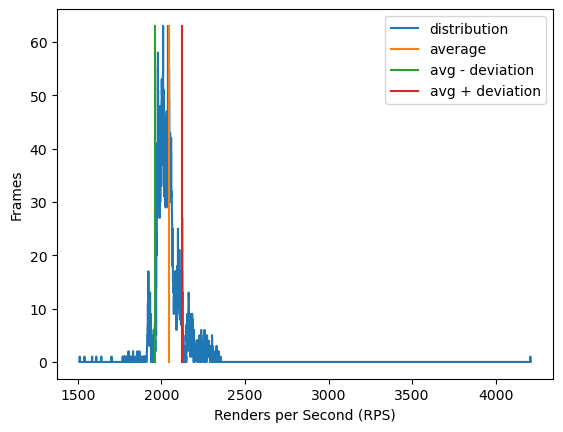

In [27]:
draw(simd_table)

Классическая реализация:

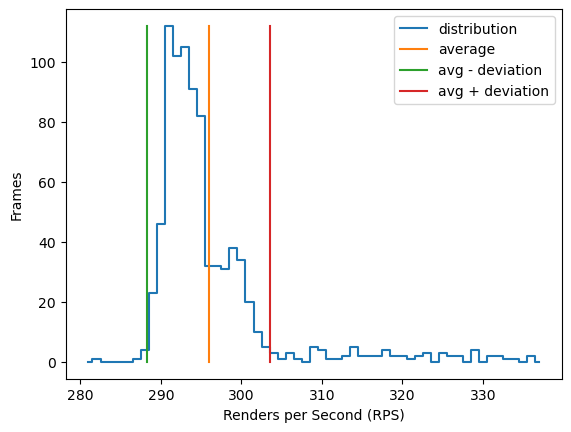

In [28]:
draw(sisd_table)